In [2]:
install.packages("ergm")
library(ergm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘network’, ‘robustbase’, ‘coda’, ‘trust’, ‘lpSolve’, ‘statnet.common’


Loading required package: network

network: Classes for Relational Data
Version 1.16.0 created on 2019-11-30.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.10.4, created on 2019-06-10
Copyright (c) 2019, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
   

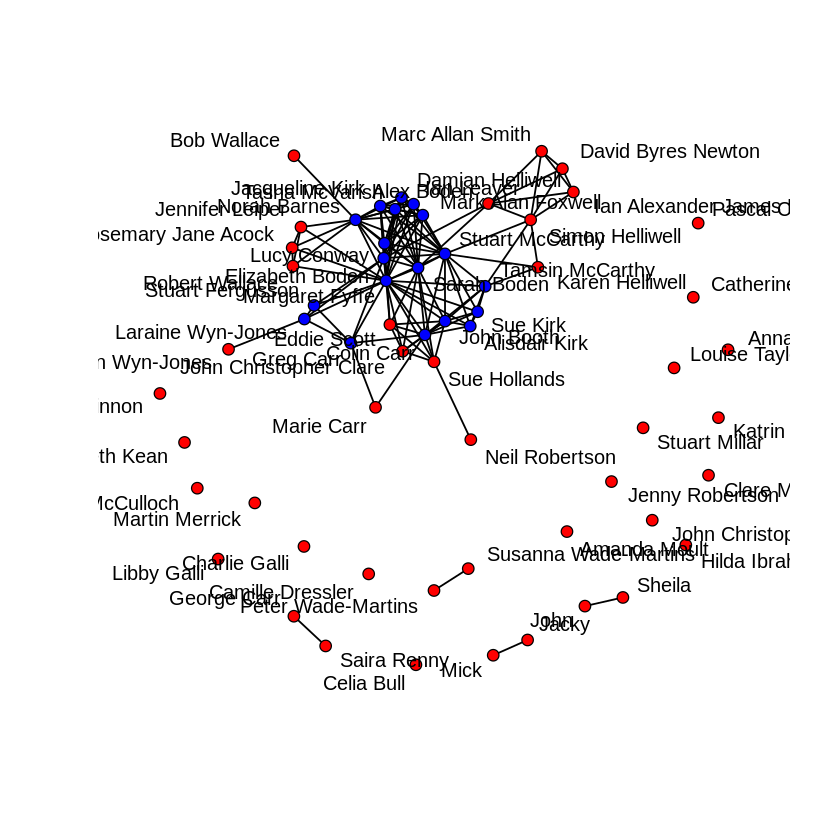

In [80]:
members <- read.table("/political.txt",header=FALSE,sep=" ")
attributes <- read.table("/politicalAttributes.txt",header=FALSE)
L <- readLines("/politicalLabels.txt")
DF <- read.table(text = L, sep = "0",header=FALSE, stringsAsFactors=F, strip.white=T, as.is=T)
attributeMatrix <- cbind(DF,attributes)
politicalNet <- network(members,vertex.attr=attributeMatrix,vertex.attrnames = c("label","political"),directed=F, hyper=F, loops=F, multiple=F, bipartite=F)
plot(politicalNet,label=get.vertex.attribute(politicalNet, "label"), vertex.col=c("blue","red")[1+(get.vertex.attribute(politicalNet, "political")==0)])

In [95]:
baseErgm <- ergm(politicalNet~edges) #Estimate the model
summary(baseErgm) #Summarize the model

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 





Summary of model fit

Formula:   politicalNet ~ edges

Iterations:  6 out of 20 

Monte Carlo MLE Results:
      Estimate Std. Error MCMC % z value Pr(>|z|)    
edges -2.54183    0.08841      0  -28.75   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 2621.5  on 1891  degrees of freedom
 Residual Deviance:  988.1  on 1890  degrees of freedom
 
AIC: 990.1    BIC: 995.7    (Smaller is better.) 

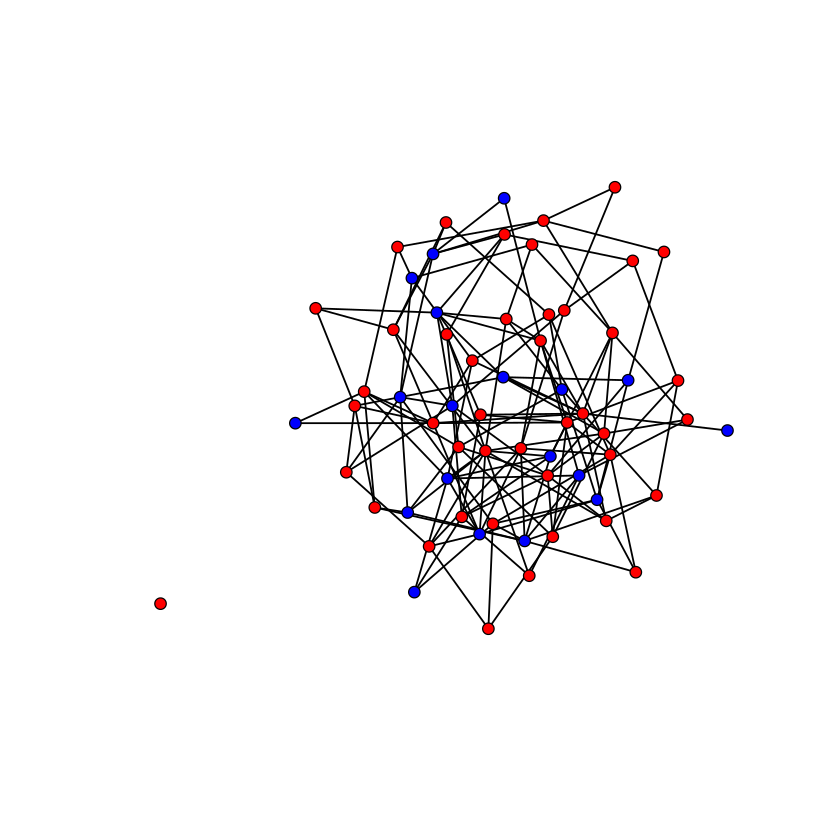

In [85]:
plot(simulate(baseErgm),
          vertex.col=c("blue","red")[ 1+(get.vertex.attribute(politicalNet, "political")==0)])

In [83]:
nodalErgm <- ergm(politicalNet~edges+nodematch("political")) #Estimate the model
summary(nodalErgm) #Summarize the model

Warning message:
“`set_attrs()` is deprecated as of rlang 0.3.0
This warning is displayed once per session.”
Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 





Summary of model fit

Formula:   politicalNet ~ edges + nodematch("political")

Iterations:  6 out of 20 

Monte Carlo MLE Results:
                    Estimate Std. Error MCMC % z value Pr(>|z|)    
edges                -3.3022     0.1891      0 -17.465   <1e-04 ***
nodematch.political   1.1214     0.2144      0   5.231   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 2621.5  on 1891  degrees of freedom
 Residual Deviance:  955.9  on 1889  degrees of freedom
 
AIC: 959.9    BIC: 971    (Smaller is better.) 

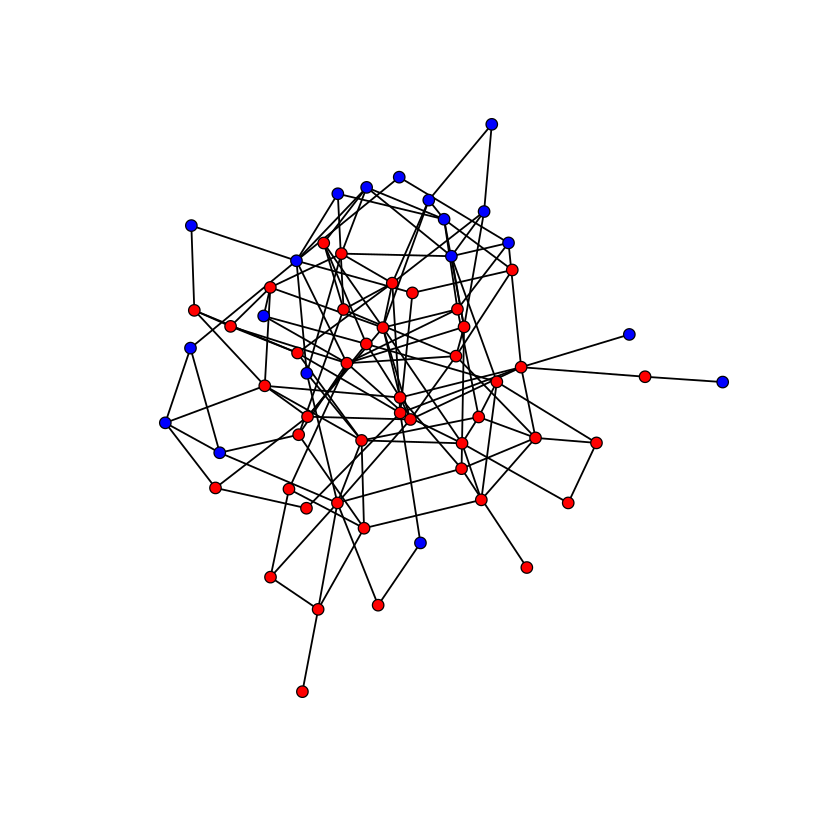

In [86]:
plot(simulate(nodalErgm),
          vertex.col=c("blue","red")[ 1+(get.vertex.attribute(politicalNet, "political")==0)])

In [94]:
triangularErgm <- ergm(politicalNet~edges+nodematch("political")+isolates) #Estimate the model
summary(triangularErgm) #Summarize the model

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 0.142140374947721.

The log-likelihood did not improve.

Iteration 2 of at most 20:

Optimizing with step length 0.532214255612588.

The log-likelihood improved by 6.443.

Iteration 3 of at most 20:



ERROR: ignored